# Data Analysis





In [ ]:
#@title Import Libraries that we need.
import sklearn
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
#@title Get the dataset.
train_data= pd.read_csv("train.csv")
#test  = pd.read_csv("test.csv")

In [ ]:
#split diamond data into data & labels
from sklearn.model_selection import train_test_split
train ,test= train_test_split(train_data,test_size= 0.2,random_state = 42 )

In [ ]:
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
21805,21806,1.55,Premium,J,VS1,62.6,59.0,8749,7.40,7.35,4.62
22939,22940,1.04,Premium,G,I1,62.2,58.0,2801,6.46,6.41,4.00
33888,33889,1.22,Premium,G,VS2,61.8,58.0,8362,6.91,6.84,4.25
35779,35780,0.51,Ideal,H,IF,62.6,56.0,1920,5.10,5.13,3.20
20589,20590,0.41,Ideal,E,SI1,62.1,54.0,969,4.81,4.76,2.97


In [ ]:
test.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
14768,14769,2.02,Ideal,J,SI1,59.8,60.0,12713,8.21,8.16,4.90
33287,33288,1.50,Premium,G,VS1,60.2,58.0,13720,7.41,7.38,4.45
2181,2182,1.04,Premium,E,VS2,61.1,59.0,7175,6.56,6.54,4.00
27850,27851,0.30,Premium,E,VS2,62.5,58.0,844,4.31,4.26,2.68
13752,13753,1.03,Premium,I,SI1,62.0,58.0,4326,6.47,6.43,4.00


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34521 entries, 21805 to 15795
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       34521 non-null  int64  
 1   carat    34521 non-null  float64
 2   cut      34521 non-null  object 
 3   color    34521 non-null  object 
 4   clarity  34521 non-null  object 
 5   depth    34521 non-null  float64
 6   table    34521 non-null  float64
 7   price    34521 non-null  int64  
 8   x        34521 non-null  float64
 9   y        34521 non-null  float64
 10  z        34521 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.2+ MB


In [ ]:
train.describe()

,Id,carat,depth,table,price,x,y,z
count,34521.000000,34521.000000,34521.000000,34521.000000,34521.000000,34521.000000,34521.000000,34521.000000
mean,21621.709771,0.797798,61.751221,57.466418,3931.306480,5.729599,5.732268,3.537777
std,12444.427233,0.475239,1.435461,2.230899,3998.158239,1.124250,1.124616,0.713282
min,3.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10846.000000,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,21637.000000,0.700000,61.800000,57.000000,2394.000000,5.690000,5.700000,3.520000
75%,32438.000000,1.040000,62.500000,59.000000,5302.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18803.000000,10.740000,31.800000,31.800000


In [ ]:
train['cut'].value_counts()

Ideal        13691
Premium       8835
Very Good     7789
Good          3156
Fair          1050
Name: cut, dtype: int64

In [ ]:
train["color"].value_counts()

G    7216
E    6299
F    6093
H    5329
D    4350
I    3388
J    1846
Name: color, dtype: int64

In [ ]:
train["clarity"].value_counts()

SI1     8312
VS2     7867
SI2     5978
VS1     5175
VVS2    3215
VVS1    2329
IF      1152
I1       493
Name: clarity, dtype: int64

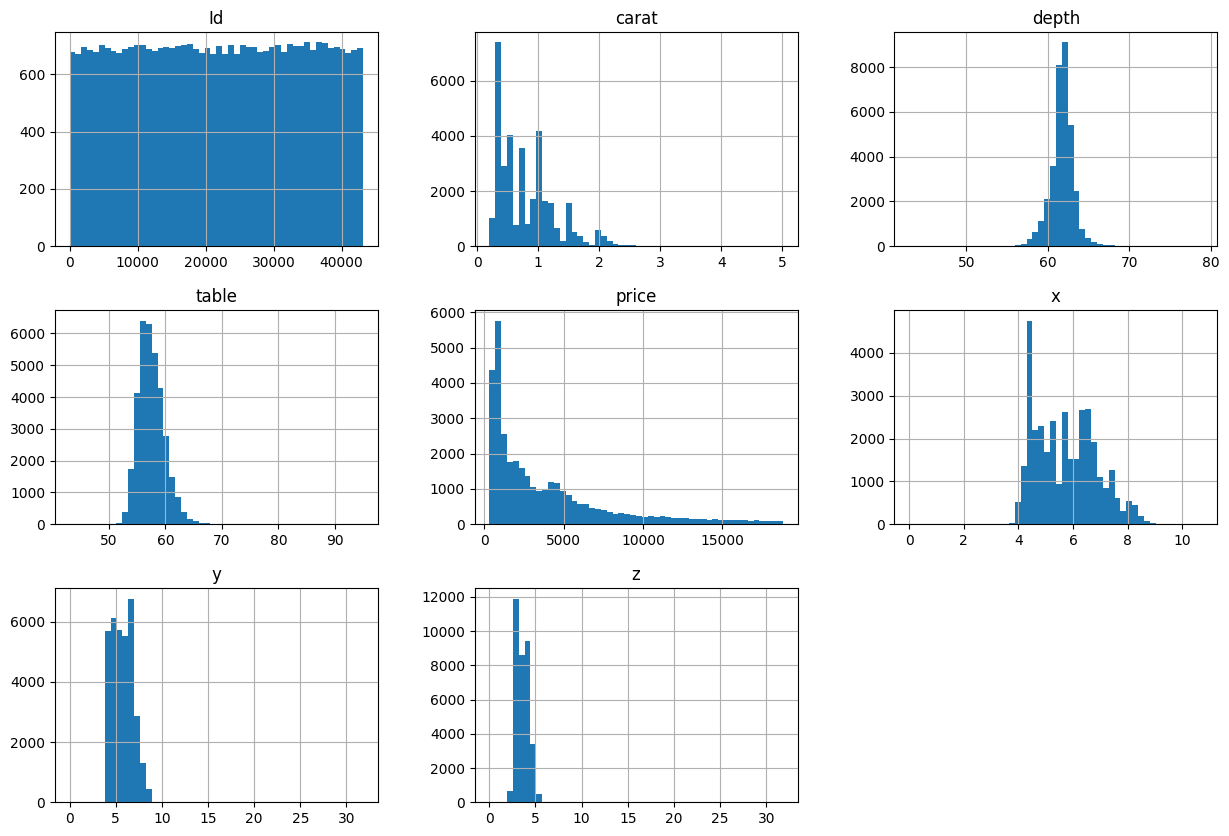

In [ ]:
# Plotting Histograms of Training Data
train.hist(figsize = (15,10),bins = 50)
plt.show()

In [ ]:
train.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
# Checking for duplicate records in the data
dups = train.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(train.shape)

Number of duplicate rows = 0
(34521, 11)


In [ ]:
print('Before',train.shape)
train.drop_duplicates(inplace=True) 
print('After',train.shape)

Before (34521, 11)
After (34521, 11)


In [ ]:
train["price"] = train["price"].astype(float)

In [ ]:
train.corr()

<ipython-input-22-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Id,carat,depth,table,price,x,y,z
Id,1.000000,-0.002709,0.002271,-0.006701,-0.004898,-0.004044,-0.002587,-0.004187
carat,-0.002709,1.000000,0.027980,0.179536,0.921341,0.975090,0.966588,0.944079
depth,0.002271,0.027980,1.000000,-0.306303,-0.010972,-0.025844,-0.028565,0.093901
table,-0.006701,0.179536,-0.306303,1.000000,0.126465,0.193843,0.185684,0.146656
price,-0.004898,0.921341,-0.010972,0.126465,1.000000,0.884537,0.879284,0.852939
x,-0.004044,0.975090,-0.025844,0.193843,0.884537,1.000000,0.990018,0.961552
y,-0.002587,0.966588,-0.028565,0.185684,0.879284,0.990018,1.000000,0.954858
z,-0.004187,0.944079,0.093901,0.146656,0.852939,0.961552,0.954858,1.000000


<Axes: >

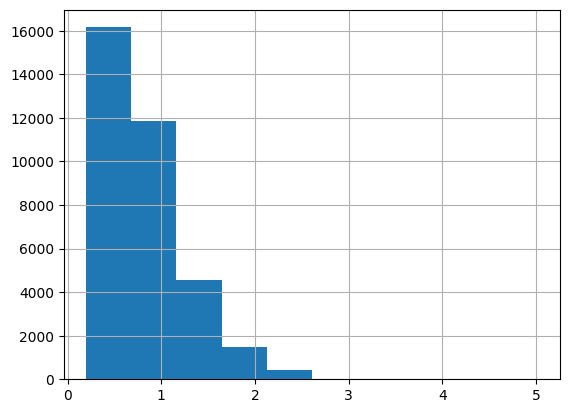

In [ ]:
train['carat'].hist()

<Axes: >

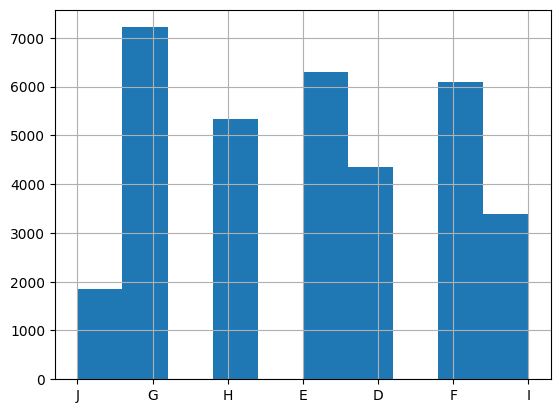

In [ ]:
train['color'].hist()

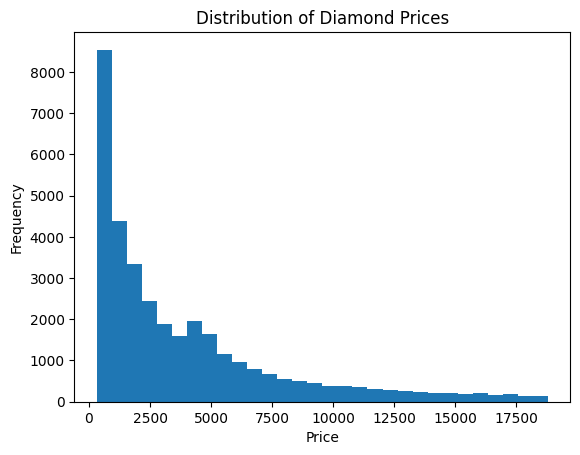

<ipython-input-25-70f5b20b1e14>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.price)


<Axes: xlabel='price', ylabel='Density'>

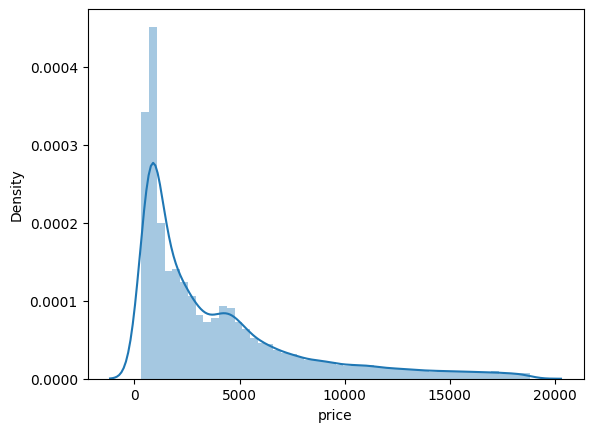

In [ ]:
# Univariate Visualization - Histogram of diamond prices
plt.hist(train['price'], bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Prices')
plt.show()

sns.distplot(train.price)

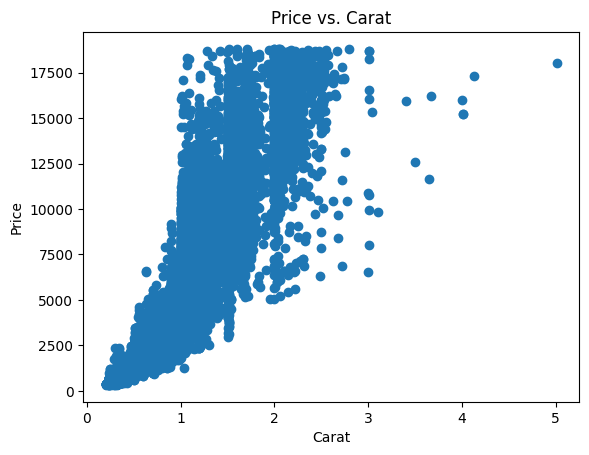

In [ ]:
# Bivariate Visualization - Scatter plot of price vs. carat
plt.scatter(train['carat'], train['price'])
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Price vs. Carat')
plt.show()

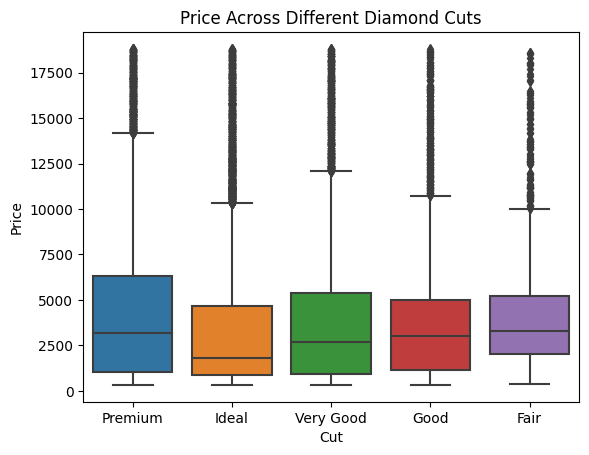

In [ ]:
# Bivariate Visualization - Box plot of price across different diamond cuts
sns.boxplot(x=train['cut'], y=train['price'])
plt.xlabel('Cut')
plt.ylabel('Price')
plt.title('Price Across Different Diamond Cuts')
plt.show()

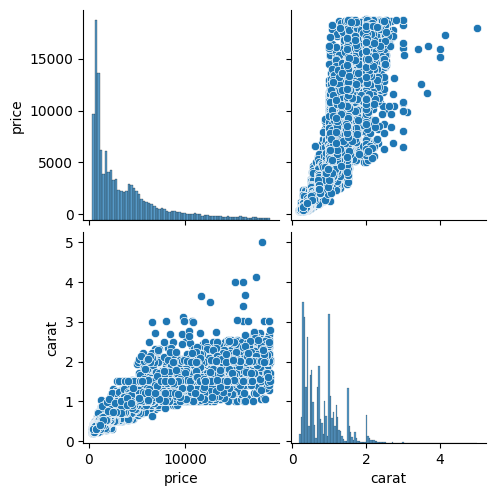

In [ ]:
# Multivariate Visualization - Pair plot of price, carat, and color
sns.pairplot(train[['price', 'carat', 'color']])
plt.show()

<ipython-input-29-7f054e6a5584>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train[['price', 'carat', 'cut', 'color']].corr()


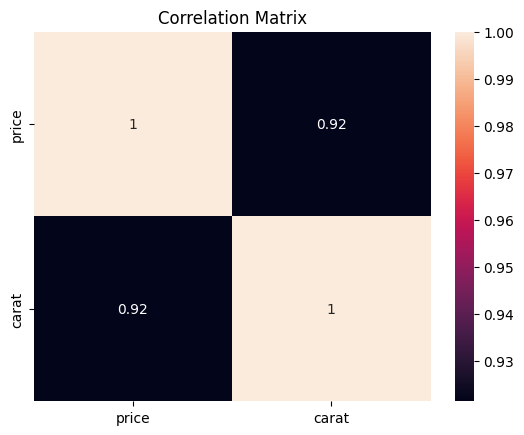

In [ ]:
# Correlation Analysis - Heatmap
correlation_matrix = train[['price', 'carat', 'cut', 'color']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
corr_matrix = train.corr()
corr_matrix["price"].sort_values(ascending=False)

<ipython-input-30-53a47a06d5bc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


price    1.000000
carat    0.921341
x        0.884537
y        0.879284
z        0.852939
table    0.126465
Id      -0.004898
depth   -0.010972
Name: price, dtype: float64

<Axes: >

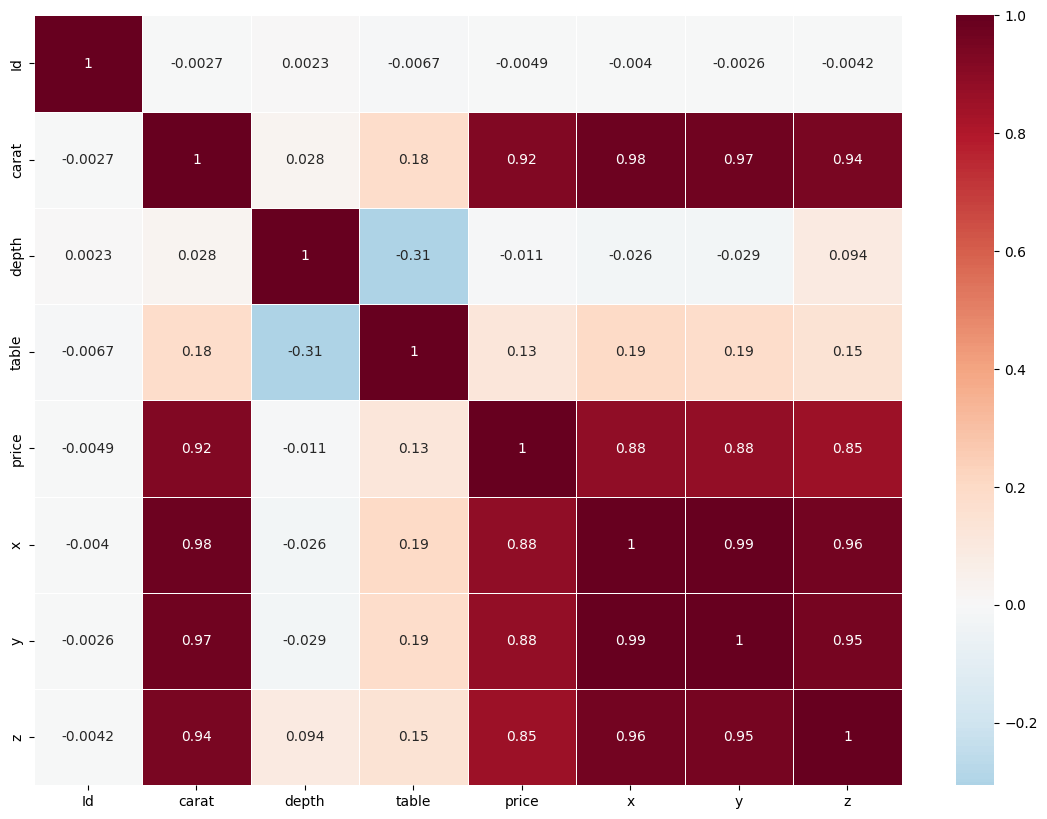

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap='RdBu_r', annot=True, linewidths=0.5, center=0)

In [ ]:
# Printing the number of rows where the 'x' feature is equal to 0
print("Number of rows with x == 0: {} ".format((train['x'] == 0).sum()))

# Printing the number of rows where the 'y' feature is equal to 0
print("Number of rows with y == 0: {} ".format((train['y'] == 0).sum()))

# Printing the number of rows where the 'z' feature is equal to 0
print("Number of rows with z == 0: {} ".format((train['z'] == 0).sum()))

# Printing the number of rows where the 'depth' feature is equal to 0
print("Number of rows with depth == 0: {} ".format((train['depth'] == 0).sum()))


Number of rows with x == 0: 5 
Number of rows with y == 0: 4 
Number of rows with z == 0: 14 
Number of rows with depth == 0: 0 


In [ ]:
# Dropping dimentionless diamonds
train = train.drop(train[train["x"]==0].index)
train = train.drop(train[train["y"]==0].index)
train = train.drop(train[train["z"]==0].index)
train.shape

(34507, 11)

In [ ]:
train.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
sns.pairplot(train, hue="cut")

# Features 

In [ ]:
train['volume']= train.x * train.y * train.z
train['carat_per_x'] = train['carat'] / train['x']
train = train.drop(['x','y','z'], axis=1)

In [ ]:
train

,Id,carat,cut,color,clarity,depth,table,price,volume,carat_per_x
21805,21806,1.55,Premium,J,VS1,62.6,59.0,8749.0,251.281800,0.209459
22939,22940,1.04,Premium,G,I1,62.2,58.0,2801.0,165.634400,0.160991
33888,33889,1.22,Premium,G,VS2,61.8,58.0,8362.0,200.873700,0.176556
35779,35780,0.51,Ideal,H,IF,62.6,56.0,1920.0,83.721600,0.100000
20589,20590,0.41,Ideal,E,SI1,62.1,54.0,969.0,67.999932,0.085239
...,...,...,...,...,...,...,...,...,...,...
6265,6266,0.74,Very Good,G,SI1,63.5,60.0,2468.0,117.817968,0.129145
11284,11285,1.04,Very Good,G,VS2,61.9,57.0,6177.0,168.379900,0.160991
38158,38159,0.30,Premium,D,SI1,62.7,60.0,709.0,47.932668,0.070423
860,861,1.50,Ideal,I,SI1,59.4,60.0,8555.0,252.778500,0.198939


<Axes: xlabel='carat', ylabel='price'>

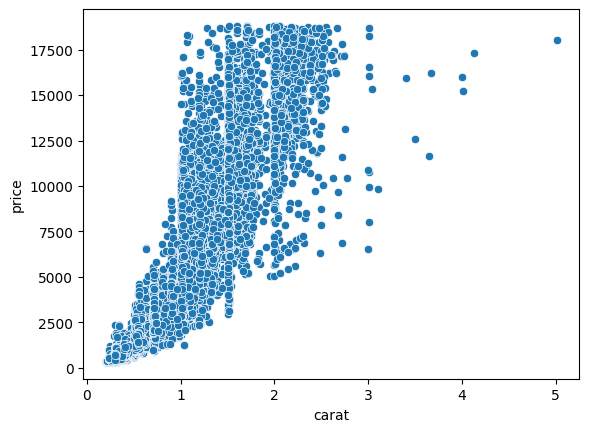

In [ ]:
sns.scatterplot(x=train.carat , y=train.price)

In [ ]:
train.head()

,Id,carat,cut,color,clarity,depth,table,price,volume,carat_per_x
21805,21806,1.55,Premium,J,VS1,62.6,59.0,8749.0,251.281800,0.209459
22939,22940,1.04,Premium,G,I1,62.2,58.0,2801.0,165.634400,0.160991
33888,33889,1.22,Premium,G,VS2,61.8,58.0,8362.0,200.873700,0.176556
35779,35780,0.51,Ideal,H,IF,62.6,56.0,1920.0,83.721600,0.100000
20589,20590,0.41,Ideal,E,SI1,62.1,54.0,969.0,67.999932,0.085239


In [ ]:
train.std()

<ipython-input-40-3f98fe744294>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.std()


Id             12443.556344
carat              0.474946
depth              1.435137
table              2.230271
price           3995.522210
volume            76.830281
carat_per_x        0.051322
dtype: float64

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3) of the 'price' column
Q1 = train['price'].quantile(0.25)
Q3 = train['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower bound and upper bound for outlier detection using the 1.5*IQR rule
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the 'train' DataFrame to include only the rows where the 'price' is within the lower and upper bounds
diamond_data = train[(train['price'] >= lower_bound) & (train['price'] <= upper_bound)]

# Print the filtered DataFrame containing the diamond data within the specified price range
print(diamond_data)

          Id  carat        cut color clarity  depth  table   price  \
21805  21806   1.55    Premium     J     VS1   62.6   59.0  8749.0   
22939  22940   1.04    Premium     G      I1   62.2   58.0  2801.0   
33888  33889   1.22    Premium     G     VS2   61.8   58.0  8362.0   
35779  35780   0.51      Ideal     H      IF   62.6   56.0  1920.0   
20589  20590   0.41      Ideal     E     SI1   62.1   54.0   969.0   
...      ...    ...        ...   ...     ...    ...    ...     ...   
6265    6266   0.74  Very Good     G     SI1   63.5   60.0  2468.0   
11284  11285   1.04  Very Good     G     VS2   61.9   57.0  6177.0   
38158  38159   0.30    Premium     D     SI1   62.7   60.0   709.0   
860      861   1.50      Ideal     I     SI1   59.4   60.0  8555.0   
15795  15796   0.41      Ideal     G    VVS1   61.5   57.0  1123.0   

           volume  carat_per_x  
21805  251.281800     0.209459  
22939  165.634400     0.160991  
33888  200.873700     0.176556  
35779   83.721600     0.100

# OneHotEncoder

In [ ]:
# One-Hot Encoding using pandas get_dummies()
# Convert categorical variables into binary columns
one_hot_encoders_train_data = pd.get_dummies(diamond_data)

# Get the column names after one-hot encoding
cols = one_hot_encoders_train_data.columns

# Create a new DataFrame with the one-hot encoded columns
train_clean_data = pd.DataFrame(one_hot_encoders_train_data, columns=cols)

# Display the first few rows of the cleaned data
train_clean_data.head()

,Id,carat,depth,table,price,volume,carat_per_x,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
21805,21806,1.55,62.6,59.0,8749.0,251.281800,0.209459,0,0,0,...,0,1,0,0,0,0,1,0,0,0
22939,22940,1.04,62.2,58.0,2801.0,165.634400,0.160991,0,0,0,...,0,0,1,0,0,0,0,0,0,0
33888,33889,1.22,61.8,58.0,8362.0,200.873700,0.176556,0,0,0,...,0,0,0,0,0,0,0,1,0,0
35779,35780,0.51,62.6,56.0,1920.0,83.721600,0.100000,0,0,1,...,0,0,0,1,0,0,0,0,0,0
20589,20590,0.41,62.1,54.0,969.0,67.999932,0.085239,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# cut_class_dict = {'Ideal':1,'Premium':2,'Very Good':3,'Fair':4,'Good':5}
# color_dict     = {'I':1,'F':2,'G':3,'H':4,'D':5,'E':6,'J':7}
# clarity_dict   = {'SI2':1,'VS2':2,'VVS2':3,'IF':4,'VS1':5,'SI1':6,'VVS1':7,'I1':8}

In [ ]:
# X_train['cut']      =X_train['cut'].map(cut_class_dict)
# X_train['clarity']  =X_train['clarity'].map(clarity_dict)
# X_train['color']    =X_train['color'].map(color_dict)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
sc_X = StandardScaler()

# Standardize the numerical features in train_clean_data
numericals =  pd.DataFrame(sc_X.fit_transform(train_clean_data[['carat','depth','table','volume','carat_per_x']]),
                           columns=['carat','depth','table','volume','carat_per_x'],
                           index=train_clean_data.index)

# Create a copy of the original DataFrame
train_clean_data_standard = train_clean_data.copy(deep=True)

# Replace the numerical features in train_clean_data with the standardized values
train_clean_data_standard[['carat','depth','table','volume','carat_per_x']] = numericals[['carat','depth','table','volume','carat_per_x']]

# Print the first few rows of the standardized DataFrame
train_clean_data_standard.head()

,Id,carat,depth,table,price,volume,carat_per_x,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
21805,21806,2.156623,0.587870,0.706269,8749.0,2.152650,2.007022,0,0,0,...,0,1,0,0,0,0,1,0,0,0
22939,22940,0.828206,0.308672,0.256102,2801.0,0.773647,0.898319,0,0,0,...,0,0,1,0,0,0,0,0,0,0
33888,33889,1.297059,0.029475,0.256102,8362.0,1.341032,1.254362,0,0,0,...,0,0,0,0,0,0,0,1,0,0
35779,35780,-0.552306,0.587870,-0.644232,1920.0,-0.545225,-0.496819,0,0,1,...,0,0,0,1,0,0,0,0,0,0
20589,20590,-0.812780,0.238873,-1.544566,969.0,-0.798359,-0.834469,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Drop 
X_train = train_clean_data_standard.drop(['price'], axis=1)
y_train= train_clean_data_standard['price']

In [ ]:
X_train.head()

,Id,carat,depth,table,volume,carat_per_x,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
21805,21806,2.156623,0.587870,0.706269,2.152650,2.007022,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
22939,22940,0.828206,0.308672,0.256102,0.773647,0.898319,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
33888,33889,1.297059,0.029475,0.256102,1.341032,1.254362,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
35779,35780,-0.552306,0.587870,-0.644232,-0.545225,-0.496819,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
20589,20590,-0.812780,0.238873,-1.544566,-0.798359,-0.834469,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X_train.shape

(32197, 26)

In [ ]:
test['volume'] = test.x * test.y * test.z
test['carat_per_x'] = test['carat'] / test['x']
test = test.drop(['x','y','z'], axis=1)

In [ ]:
one_hot_encoders_test_data =  pd.get_dummies(test)
cols = one_hot_encoders_test_data.columns
test_clean_data = pd.DataFrame(one_hot_encoders_test_data,columns= cols)
test_clean_data.head()

,Id,carat,depth,table,price,volume,carat_per_x,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
14768,14769,2.02,59.8,60.0,12713,328.268640,0.246041,0,0,1,...,0,1,0,0,1,0,0,0,0,0
33287,33288,1.50,60.2,58.0,13720,243.351810,0.202429,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2181,2182,1.04,61.1,59.0,7175,171.609600,0.158537,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27850,27851,0.30,62.5,58.0,844,49.206408,0.069606,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13752,13753,1.03,62.0,58.0,4326,166.408400,0.159196,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
numericals =  pd.DataFrame(sc_X.transform(test_clean_data[['carat','depth','table','volume','carat_per_x']]),
                           columns=['carat','depth','table','volume','carat_per_x'],
                           index=test_clean_data.index)

test_clean_data_standard = test_clean_data.copy(deep=True)
test_clean_data_standard[['carat','depth','table','volume','carat_per_x']] = numericals[['carat','depth','table','volume','carat_per_x']]

In [ ]:
test

,Id,carat,cut,color,clarity,depth,table,price,volume,carat_per_x
14768,14769,2.02,Ideal,J,SI1,59.8,60.0,12713,328.268640,0.246041
33287,33288,1.50,Premium,G,VS1,60.2,58.0,13720,243.351810,0.202429
2181,2182,1.04,Premium,E,VS2,61.1,59.0,7175,171.609600,0.158537
27850,27851,0.30,Premium,E,VS2,62.5,58.0,844,49.206408,0.069606
13752,13753,1.03,Premium,I,SI1,62.0,58.0,4326,166.408400,0.159196
...,...,...,...,...,...,...,...,...,...,...
16604,16605,1.07,Ideal,F,VS2,62.0,57.0,6459,171.584400,0.164615
40456,40457,0.32,Premium,J,VS1,61.7,58.0,540,52.227120,0.072727
35782,35783,1.21,Very Good,G,SI2,62.8,60.0,5558,191.868570,0.180597
20632,20633,1.02,Ideal,E,SI2,61.6,55.0,4824,168.476800,0.157895


In [ ]:
# test['volume'] = test.x * test.y * test.z
# test['carat_per_x'] = test['carat'] / test['x']
# test = test.drop(['x','y','z'], axis=1)

In [ ]:
X_test =test_clean_data_standard.drop(["price"],axis=1)
X_test.head()

,Id,carat,depth,table,volume,carat_per_x,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
14768,14769,3.380851,-1.366513,1.156435,3.392209,2.843820,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
33287,33288,2.026386,-1.087316,0.256102,2.024969,1.846207,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2181,2182,0.828206,-0.459121,0.706269,0.869853,0.842182,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
27850,27851,-1.099302,0.518070,0.256102,-1.100952,-1.192080,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
13752,13753,0.802158,0.169073,0.256102,0.786109,0.857272,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
X_test.shape

(8631, 26)

In [ ]:
y_test=test['price']

In [ ]:
rmse_ = []
def evaluate_model(model, X, y):
    # Fit the model
    model.fit(X, y)
    
    # Make predictions on the training data
    y_pred = model.predict(X)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-cv_scores)
    avg_rmse = rmse_scores.mean()
    std_rmse = rmse_scores.std()
    
    # Return the evaluation metrics
    return mae, rmse, rmse_scores, avg_rmse, std_rmse


`These metrics help evaluate the accuracy and performance of my regression model for predicting diamond prices. Lower values of MAE and RMSE indicate better performance, while a smaller standard deviation suggests more consistent performance across different folds.`

In [ ]:
def mean_squarederror(y_pred, y_test):
    mse = mean_squared_error(y_pred, y_test)
    rmse = np.sqrt(mse)
    return rmse

`The RMSE is a valuable metric for assessing the performance of regression models and understanding the accuracy of their predictions. It helps in comparing models, identifying areas for improvement, and making informed decisions based on the prediction errors.`

In [ ]:
def print_values(mae, rmse, rmse_scores, avg_rmse, std_rmse):
    print("MAE:", mae)
    print("RMSE:", rmse)
    print("Cross-Validation RMSE Scores:", rmse_scores)
    print("Mean RMSE:", avg_rmse)
    print("Standard Deviation of RMSE:", std_rmse)

In [ ]:
X_train.shape

(32197, 26)

# Linear Regressor Model

In [ ]:
# Creating an instance of LinearRegression model
model_1 = LinearRegression()

# Fitting the model to the training data
model_1.fit(X_train, y_train)

# Evaluating the model and calculating various metrics
mae, rmse, rmse_scores, avg_rmse, std_rmse = evaluate_model(model_1, X_train, y_train)

# Printing the evaluation metrics
print_values(mae, rmse, rmse_scores, avg_rmse, std_rmse)

MAE: 541.4007543392661
RMSE: 794.557902432963
Cross-Validation RMSE Scores: [784.89901586 802.86355167 821.0631159  763.57066712 820.0310868
 786.98672935 798.59279535 799.48417807 810.67266132 775.09149279]
Mean RMSE: 796.3255294226831
Standard Deviation of RMSE: 17.830167791260067


**MAE (Mean Absolute Error):** *It measures the average absolute difference between the predicted and actual values. In this case, the MAE is approximately 541.40, indicating that, on average, the predicted diamond prices differ by around $541.40 from the actual prices.*


---


**RMSE (Root Mean Squared Error):** *It represents the square root of the average squared difference between the predicted and actual values. The RMSE value is approximately 794.56, indicating that, on average, the predicted diamond prices deviate by around $794.56 from the actual prices.*


---


**Cross-Validation RMSE Scores:** *These are the individual RMSE scores obtained during the cross-validation process. Each score represents the performance of the model on a different fold of the training data. The array of scores shows the variability in the model's performance across the folds.*


---


**Mean RMSE:** *It represents the mean of the cross-validation RMSE scores. In this case, the mean RMSE is approximately 796.33, which provides an overall assessment of the model's performance across all folds.*


---

**Standard Deviation of RMSE:** *It measures the variability or spread of the cross-validation RMSE scores around the mean. The standard deviation is approximately 17.83, indicating the degree of inconsistency or variability in the model's performance across the folds.*

In [ ]:
# Predicting the target variable using the trained model
y_pred = model_1.predict(X_test)

# Calculating and storing the RMSE (Root Mean Squared Error) between the predicted values and the actual target values
rmse_.append(mean_squarederror(y_pred, y_test))

# Calculating the RMSE between the predicted values and the actual target values
mean_squarederror(y_pred, y_test)

1213.7067737068662

`Based on this output, the RMSE between the predicted and actual values is approximately 1213.71. This value represents the average difference between the predicted and actual diamond prices, with higher values indicating larger deviations or errors in the predictions.`

# Decision Tree Regressor Model

In [ ]:
# Creating an instance of DecisionTreeRegressor  model
model_2 = DecisionTreeRegressor()

# Fitting the model to the training data
model_2.fit(X_train, y_train)

# Evaluating the model and calculating various metrics
mae, rmse, rmse_scores, avg_rmse, std_rmse = evaluate_model(model_2, X_train, y_train)

# Printing the evaluation metrics
print_values(mae, rmse, rmse_scores, avg_rmse, std_rmse)

MAE: 0.0
RMSE: 0.0
Cross-Validation RMSE Scores: [560.27481361 524.91421778 502.52492692 553.7496253  502.25373589
 522.80297852 502.84328468 536.29445819 548.40047028 508.18055598]
Mean RMSE: 526.223906713902
Standard Deviation of RMSE: 21.28894121980884


**MAE (Mean Absolute Error):** *It indicates the average absolute difference between the predicted and actual values. In this case, the MAE is 0.0, which means the model perfectly predicts the target variable.*


---


**RMSE (Root Mean Squared Error):** *It measures the square root of the average squared difference between the predicted and actual values. Again, the RMSE is 0.0, indicating perfect predictions.*


---


**Cross-Validation RMSE Scores:** *These are the RMSE scores obtained through cross-validation. Each score represents the performance of the model on a different fold of the training data. The array shows the RMSE scores for each fold.*


---


**Mean RMSE:** *It is the average of the cross-validation RMSE scores. In this case, the mean RMSE is 526.223906713902, which provides an overall measure of the model's performance.*


---


**Standard Deviation of RMSE:** *It quantifies the variability or spread of the RMSE scores across the cross-validation folds. A lower standard deviation indicates more consistent performance. Here, the standard deviation of RMSE is 21.28894121980884.*

In [ ]:
# Predicting the target variable using the trained model
y_pred = model_2.predict(X_test)

# Calculating and storing the RMSE (Root Mean Squared Error) between the predicted values and the actual target values
rmse_.append(mean_squarederror(y_pred, y_test))

# Calculating the RMSE between the predicted values and the actual target values
mean_squarederror(y_pred, y_test)

1275.250564159976

`The RMSE of 1275.250564159976 indicates the average magnitude of the prediction error. A higher RMSE value suggests that the model's predictions have a larger average deviation from the actual values.`

# Random Forest Regressor Model

In [ ]:
# Creating an instance of RandomForestRegressor  model
model_3 = RandomForestRegressor()

# Fitting the model to the training data
model_3.fit(X_train, y_train)

# Evaluating the model and calculating various metrics
mae, rmse, rmse_scores, avg_rmse, std_rmse = evaluate_model(model_3, X_train, y_train)

# Printing the evaluation metrics
print_values(mae, rmse, rmse_scores, avg_rmse, std_rmse)

MAE: 81.9505783147498
RMSE: 144.05683694353885
Cross-Validation RMSE Scores: [408.60454291 387.06456262 393.71143249 389.51896398 368.41726492
 368.87574281 371.66194149 419.79291374 391.68964748 383.68857207]
Mean RMSE: 388.3025584505657
Standard Deviation of RMSE: 15.870030508618356


**MAE (Mean Absolute Error):** *The MAE value of 81.9505 indicates, on average, the model's predictions deviate from the actual target values by approximately 81.9505 units.*


---


**RMSE (Root Mean Squared Error):** *The RMSE value of 144.0568 represents the average deviation between the predicted values and the actual target values. It is a measure of the model's overall performance, with a lower value indicating better accuracy.*


---


**Cross-Validation RMSE Scores:** *The list of RMSE scores obtained from cross-validation represents the performance of the model on each fold of the cross-validation process. These scores, including values such as 408.6045, 387.0646, 393.7114, etc., show the deviation between predicted and actual values for each fold.*


---


**Mean RMSE:** *The mean RMSE value of 388.3026 is the average of the cross-validation RMSE scores. It provides an overall measure of the model's performance across multiple folds.*


---


**Standard Deviation of RMSE:** *The standard deviation of the RMSE scores (15.8700) indicates the variability or spread of the scores. A smaller value suggests that the model's performance is consistent across different folds.*

In [ ]:
# Predicting the target variable using the trained model
y_pred = model_3.predict(X_test)

# Calculating and storing the RMSE (Root Mean Squared Error) between the predicted values and the actual target values
rmse_.append(mean_squarederror(y_pred, y_test))

# Calculating the RMSE between the predicted values and the actual target values
mean_squarederror(y_pred, y_test)

1208.5026469004063

`The calculated RMSE between the predicted values and the actual target values is 1208.5026. This value represents the average deviation between the predicted diamond prices and the actual prices in the test dataset. A lower RMSE indicates better accuracy of the model's predictions.`

# Random Forest Regressor Hyperparameter tuning

In [ ]:
model_4=RandomForestRegressor()
# Define the parameter distribution for Randomized Search
param_distribution = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': [None] + list(np.arange(5, 20, 5)),
    'min_samples_split': np.arange(2, 11, 2),
    'min_samples_leaf': np.arange(1, 6, 1),
    'max_features': ['auto', 'sqrt']
}
# Perform Randomized Search
random_search = RandomizedSearchCV(model_4, param_distributions=param_distribution, n_iter=10, cv=5, scoring='neg_mean_squared_error')

# Evaluating the model and calculating various metrics
mae, rmse, rmse_scores, avg_rmse, std_rmse = evaluate_model(model_4, X_train, y_train)

# Printing the evaluation metrics
print_values(mae, rmse, rmse_scores, avg_rmse, std_rmse)

MAE: 81.8850125788117
RMSE: 144.7468842669653
Cross-Validation RMSE Scores: [406.44759397 392.0720964  391.52634859 386.23417213 369.96859344
 371.20971376 371.13828099 417.08862122 391.44690964 391.5279832 ]
Mean RMSE: 388.86603133366697
Standard Deviation of RMSE: 14.583509559505584


**MAE (Mean Absolute Error):** *It measures the average absolute difference between the predicted and actual values. In this case, the MAE is 81.885.*


---


**RMSE (Root Mean Squared Error):** *It measures the square root of the average squared difference between the predicted and actual values. The RMSE is 144.747, indicating the average prediction error of the model.*


---


**Cross-Validation RMSE Scores:** *These are the RMSE scores obtained through cross-validation, where the dataset is divided into multiple subsets (folds) for training and evaluation. The provided scores are [406.448, 392.072, 391.526, 386.234, 369.969, 371.210, 371.138, 417.089, 391.447, 391.528]. These scores give an idea of the model's performance across different subsets of the data.*


---


**Mean RMSE:** *It represents the average of the cross-validation RMSE scores. The mean RMSE is 388.866. *


---


**Standard Deviation of RMSE:** *It indicates the variability or spread of the RMSE scores. A lower standard deviation suggests more consistent performance. The standard deviation of RMSE is 14.584.*

In [ ]:
# Predicting the target variable using the trained model
y_pred = model_4.predict(X_test)

# Calculating and storing the RMSE (Root Mean Squared Error) between the predicted values and the actual target values
rmse_.append(mean_squarederror(y_pred, y_test))

# Calculating the RMSE between the predicted values and the actual target values
mean_squarederror(y_pred, y_test)

1207.8012253615625

`The RMSE of 1207.8012253615625 suggests that, on average, the predicted values are approximately 1207.80 units away from the actual target values. This indicates the level of error or deviation in the model's predictions.`

In [ ]:
# Creating an instance of KNeighborsRegressor model
model_test = RandomForestRegressor(criterion= 'squared_error',max_depth= 8,max_features= 6,n_estimators= 500)

# Fitting the model to the training data
model_test.fit(X_train,y_train)

# Evaluating the model and calculating various metrics
mae, rmse, rmse_scores, avg_rmse, std_rmse = evaluate_model(model_5, X_train, y_train)

# Printing the evaluation metrics
print_values(mae, rmse, rmse_scores, avg_rmse, std_rmse)

MAE: 1819.031617852595
RMSE: 2352.30303903717
Cross-Validation RMSE Scores: [2703.83012497 2777.08544343 2713.6581184  2783.62563438 2778.200739
 2824.04990273 2765.72621625 2730.43339377 2709.81199705 2776.41402942]
Mean RMSE: 2756.2835599400764
Standard Deviation of RMSE: 37.607812032299165


In [ ]:
# Predicting the target variable using the trained model
y_pred = model_test.predict(X_test)

# Calculating and storing the RMSE (Root Mean Squared Error) between the predicted values and the actual target values
rmse_.append(mean_squarederror(y_pred, y_test))

# Calculating the RMSE between the predicted values and the actual target values
mean_squarederror(y_pred, y_test)

1492.531465995869

# KNeighbors Regressor Model

In [ ]:
# Creating an instance of KNeighborsRegressor model
model_5 = KNeighborsRegressor(n_neighbors = 8)
# Fitting the model to the training data
model_5.fit(X_train, y_train)

# Evaluating the model and calculating various metrics
mae, rmse, rmse_scores, avg_rmse, std_rmse = evaluate_model(model_5, X_train, y_train)

# Printing the evaluation metrics
print_values(mae, rmse, rmse_scores, avg_rmse, std_rmse)

MAE: 1819.031617852595
RMSE: 2352.30303903717
Cross-Validation RMSE Scores: [2703.83012497 2777.08544343 2713.6581184  2783.62563438 2778.200739
 2824.04990273 2765.72621625 2730.43339377 2709.81199705 2776.41402942]
Mean RMSE: 2756.2835599400764
Standard Deviation of RMSE: 37.607812032299165



**MAE (Mean Absolute Error):**  *The average absolute difference between the predicted values and the actual values. In this case, the MAE is 1819.031617852595.*

---

**RMSE (Root Mean Squared Error):**  *The square root of the average squared difference between the predicted values and the actual values. In this case, the RMSE is 2352.30303903717.*


---


**Cross-Validation RMSE Scores:** *This is a list of RMSE scores obtained from cross-validation. Each score represents the performance of the model on a particular fold of the data during cross-validation. The list contains 10 scores: [2703.83012497, 2777.08544343, 2713.6581184, 2783.62563438, 2778.200739, 2824.04990273, 2765.72621625, 2730.43339377, 2709.81199705, 2776.41402942].*

---


**Mean RMSE:** *The average RMSE score from the cross-validation. In this case, the mean RMSE is 2756.2835599400764.

---


**Standard Deviation of RMSE:** *The measure of variation or dispersion of the RMSE scores. It indicates how much the RMSE scores deviate from the mean. In this case, the standard deviation of RMSE is 37.607812032299165.

In [ ]:
# Predicting the target variable using the trained model
y_pred = model_5.predict(X_test)

# Calculating and storing the RMSE (Root Mean Squared Error) between the predicted values and the actual target values
rmse_.append(mean_squarederror(y_pred, y_test))

# Calculating the RMSE between the predicted values and the actual target values
mean_squarederror(y_pred, y_test)

3902.0863711968013

`The RMSE is 3902.0863711968013. The RMSE is a measure of the average difference between the predicted values and the actual values, where a lower value indicates better accuracy.`

# XGB Regressor Model

In [ ]:
# Creating an instance of XGBRegressor model
model_6 = XGBRegressor()
# Fitting the model to the training data
model_test.fit(X_train,y_train)

# Evaluating the model and calculating various metrics
mae, rmse, rmse_scores, avg_rmse, std_rmse = evaluate_model(model_6, X_train, y_train)

# Printing the evaluation metrics
print_values(mae, rmse, rmse_scores, avg_rmse, std_rmse)

MAE: 171.11795234176637
RMSE: 269.03938110868876
Cross-Validation RMSE Scores: [402.94520939 391.79305704 387.39840502 393.46196013 382.13777782
 382.11012246 375.9629195  412.16509061 393.79524891 387.07317684]
Mean RMSE: 390.8842967713357
Standard Deviation of RMSE: 10.085102579889899



**MAE (Mean Absolute Error):** *It measures the average absolute difference between the predicted values and the actual values. In this case, the MAE value of 171.11795234176637 indicates that, on average, the model's predictions deviate from the actual values by approximately 171.12 units.*

---


**RMSE (Root Mean Squared Error):** *It is another measure of the average difference between the predicted values and the actual values, but it gives more weight to larger errors. The RMSE value of 269.03938110868876 indicates that, on average, the model's predictions deviate from the actual values by approximately 269.04 units. It is a commonly used metric to assess the overall accuracy of a regression model.*

---


**Cross-Validation RMSE Scores:** *These are the RMSE scores calculated for each fold in the cross-validation process. The values [402.94520939, 391.79305704, 387.39840502, 393.46196013, 382.13777782, 382.11012246, 375.9629195, 412.16509061, 393.79524891, 387.07317684] represent the RMSE for each fold, indicating the variation in performance across different subsets of the data.*

---


**Mean RMSE:** *It is the average of the cross-validation RMSE scores. The mean RMSE value of 390.8842967713357 provides an overall measure of the model's performance across all folds.*

---


**Standard Deviation of RMSE:** *It quantifies the variability or spread of the cross-validation RMSE scores. The standard deviation value of 10.085102579889899 indicates the average amount of deviation from the mean RMSE. A lower standard deviation suggests more consistent performance across folds.*

In [ ]:
# Predicting the target variable using the trained model
y_pred = model_6.predict(X_test)

# Calculating and storing the RMSE (Root Mean Squared Error) between the predicted values and the actual target values
rmse_.append(mean_squarederror(y_pred, y_test))

# Calculating the RMSE between the predicted values and the actual target values
mean_squarederror(y_pred, y_test)

1133.0753141019209


`The RMSE value of 1133.0753141019209 indicates that, on average, the model's predictions deviate from the actual values by approximately 1133.08 units.
A lower RMSE value is desirable as it indicates better accuracy and a closer fit between the predicted and actual values.`

In [ ]:
# Creating an instance of XGBRegressor model
model_7=XGBRegressor(colsample_bytree= 0.7,learning_rate= 0.03,max_depth= 7,min_child_weight= 5,n_estimators= 500,nthread= 1,objective= 'reg:squarederror',subsample= 0.7)

# Fitting the model to the training data
model_test.fit(X_train,y_train)

# Evaluating the model and calculating various metrics
mae, rmse, rmse_scores, avg_rmse, std_rmse = evaluate_model(model_7, X_train, y_train)

# Printing the evaluation metrics
print_values(mae, rmse, rmse_scores, avg_rmse, std_rmse)

MAE: 179.68351721103826
RMSE: 290.90885867649433
Cross-Validation RMSE Scores: [389.28135251 376.19496245 370.09938041 376.76290837 360.31264318
 365.84723243 355.27806342 398.37545948 378.07345985 370.07212269]
Mean RMSE: 374.02975847941354
Standard Deviation of RMSE: 12.213450863950811


In [ ]:
# Predicting the target variable using the trained model
y_pred = model_7.predict(X_test)

# Calculating and storing the RMSE (Root Mean Squared Error) between the predicted values and the actual target values
rmse_.append(mean_squarederror(y_pred, y_test))

# Calculating the RMSE between the predicted values and the actual target values
mean_squarederror(y_pred, y_test)

1142.9584437006445

In [ ]:
# Creating an instance of XGBRegressor model
model_8=XGBRegressor(colsample_bytree= 0.7,learning_rate= 0.01,max_depth= 7,min_child_weight= 5,n_estimators= 500,nthread= 1,objective= 'reg:squarederror',subsample= 0.7)

# Fitting the model to the training data
model_test.fit(X_train,y_train)

# Evaluating the model and calculating various metrics
mae, rmse, rmse_scores, avg_rmse, std_rmse = evaluate_model(model_8, X_train, y_train)

# Printing the evaluation metrics
print_values(mae, rmse, rmse_scores, avg_rmse, std_rmse)

MAE: 216.6984019429505
RMSE: 363.47530584937476
Cross-Validation RMSE Scores: [416.84657019 409.1009423  401.51562549 399.12637616 385.5586209
 396.9864797  377.15938497 430.08514874 406.30309624 404.54207306]
Mean RMSE: 402.7224317749416
Standard Deviation of RMSE: 14.143486571556746


In [ ]:
# Predicting the target variable using the trained model
y_pred = model_8.predict(X_test)

# Calculating and storing the RMSE (Root Mean Squared Error) between the predicted values and the actual target values
rmse_.append(mean_squarederror(y_pred, y_test))

# Calculating the RMSE between the predicted values and the actual target values
mean_squarederror(y_pred, y_test)

1240.7125024079858

In [ ]:
# Creating an instance of XGBRegressor model
model_9=XGBRegressor(learning_rate=0.05, max_depth=7, n_estimators=500, nthread=1,
             objective='reg:squarederror')

# Fitting the model to the training data
model_test.fit(X_train,y_train)

# Evaluating the model and calculating various metrics
mae, rmse, rmse_scores, avg_rmse, std_rmse = evaluate_model(model_9, X_train, y_train)

# Printing the evaluation metrics
print_values(mae, rmse, rmse_scores, avg_rmse, std_rmse)

MAE: 153.83290587334386
RMSE: 243.5859461676844
Cross-Validation RMSE Scores: [388.44669732 381.79916358 374.38763389 383.57995075 359.26540803
 363.96254918 357.88123575 405.42612846 376.49783699 376.81443427]
Mean RMSE: 376.80610382394127
Standard Deviation of RMSE: 13.646070885197304


In [ ]:
# Predicting the target variable using the trained model
y_pred = model_9.predict(X_test)

# Calculating and storing the RMSE (Root Mean Squared Error) between the predicted values and the actual target values
rmse_.append(mean_squarederror(y_pred, y_test))

# Calculating the RMSE between the predicted values and the actual target values
mean_squarederror(y_pred, y_test)

1140.9780066865646

1140.9780066865646